In [14]:
import pandas as pd

df = pd.read_csv("party_speeches_classification.csv")

df.head()

df.shape


/tmp/ipykernel_13079/1520160456.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("party_speeches_classification.csv")


(630498, 11)

In [11]:
# output all parties mentioned in the dataset
parties = set()
for i, row in df.iterrows():
    if isinstance(row['party'], str):
        for party in row['party'].split(','):
            parties.add(party.strip())
print("Parties mentioned in the dataset:")
for party in sorted(parties):
    print(party)


Parties mentioned in the dataset:
50PLUS
50PLUS/Baay-Timmerman
50PLUS/Klein
50PLUS/Krol
BBB
BIJ1
Bontes
Brinkman
CDA
ChristenUnie
D66
DENK
EP/CDA
EP/CU/SGP
EP/ChristenUnie
EP/ChristenUnie/SGP
EP/D66
EP/FVD
EP/GroenLinks
EP/JA21
EP/PvdA
EP/PvdD
EP/SGP
EP/SP
EP/VVD
FVD
Forum voor Democratie
Fractie Den Haan
Fractie-Den Haan
FvD
GKVK
GroenLinks
GroenLinks-PvdA
Groep Bontes/Van Klaveren
Groep Kuzu/Öztürk
Groep Van Haga
Houwers
JA21
Klein
Krol
Lid Ephraim
Lid Omtzigt
Monasch
NSC
PVV
PW
PvdA
PvdD
SGP
SP
VVD
Van Haga
Van Kooten-Arissen
Van Vliet
Verdonk
Volt
WD
groep Kortenoeven/Hernandez
het lid Omtzigt
lid Tweede Kamer
lid der commissie
lid van de commissie
vKA
voorzitter der commissie
voorzitter van de commissie
voorzitter van het stembureau


In [4]:
# Remove not a party
def remove_not_a_party(party):
    if party in ['lid der commissie', 'lid van de commissie', 'voorzitter van de commissie', 'voorzitter der commissie', 'voorzitter van het stembureau', 'VOORZITTER']:
        return None
    elif party in ['EP/CDA', 'EP/CU/SGP', 'EP/ChristenUnie', 'EP/ChristenUnie/SGP', 'EP/D66', 'EP/FVD', 'EP/GroenLinks', 'EP/JA21', 'EP/PvdA', 'EP/PvdD', 'EP/SGP', 'EP/SP', 'EP/VVD']:
        return None
    else:
        return party

# Combine all parties that are actually the same
def combine_parties(party):
    if party in ['50PLUS', '50PLUS/Baay-Timmerman', '50PLUS/Klein', '50PLUS/Krol']:
        return '50PLUS'
    elif party in ['FVD', 'Forum voor Democratie', 'FvD']:
        return 'FvD'
    elif party in ['Fractie Den Haan', 'Fractie-Den Haan']:
        return 'Fractie Den Haan'
    elif party in ['GroenLinks', 'GroenLinks-PvdA', 'PvdA']:
        return 'GroenLinks-PvdA'
    elif party in ['Groep Kuzu/Öztürk', 'DENK']:
        return 'DENK'
    elif party in ['Lid Omtzigt', 'NSC', 'het lid Omtzigt']:
        return 'NSC'
    elif party in ['PVV', 'PW']:
        return 'PVV'
    elif party in ['VVD', 'WD']:
        return 'VVD'
    else:
        return party
    
df['party'] = df['party'].apply(remove_not_a_party)
df['party'] = df['party'].apply(combine_parties)


In [13]:
#print all speakers without no party 
# speakers_without_party = df[df['party'] == '']['speaker'].unique()
speakers_without_party = df[df['party'].isnull()]['speaker'].unique()
# speakers_without_party = df[df['party'].isna()]['speaker'].unique()

speakers_without_party = list(speakers_without_party)
# Print the results
print("Speakers without a party:")
for speaker in speakers_without_party:
    print(speaker)

Speakers without a party:
VOORZITTER
Opstelten
Schouten
Kamp
Blok
Koolmees
Koenders
Wiebes
Knops
Rutte
Schippers
Verhagen
De Jonge
Bruins
Dijsselbloem
Bruins Slot
Hoekstra
Van Weyenberg
Slob
Van Gennip
Weerwind
Bussemaker
Ollongren
Asscher
Kuipers
Plasterk
Helder
Hillen
Ploumen
Grapperhaus
Van Hijum
Van Engelshoven
Schreinemacher
Keijzer
Agema
Jetten
Spies
Staghouwer
Dekker
Balkenende
Harbers
Donner
Adema
Van Middelkoop
De Jager
Adriaansens
Kaag
Rosenthal
Heinen
Dijkgraaf
Schoof
Faber
Timmermans
Wiersma
Veldkamp
Brekelmans
Leers
Van Leeuwen
Bijleveld
Dijkstra
Zijlstra
Klever
Hermans
Van Rijn
Madlener
Paul
Van Weel
Beljaarts
Uitermark
Cramer
Visser
Bos
Vogelaar
Verburg
Verburgiserduidelijkover
Boekhoudt
Verhagengeeftunoutoe
Boszeiwekengeleden
Hirsch Ballin
Verhagenzeihetexpliciet
Antwoord
Ellian
Azmani
Van Baalen
Groothuis
In 't Veld
Gerbrandy
Rafaela
De Lange
Lenaers
Berendsen
Van de Camp
Jongerius
Tang
Chahim
Berman
Eickhout
Sargentini
Cornelissen
Roos
Hoogeveen
Ruissen
Van Haersma Bu

Speakers without a party:
VOORZITTER = NaN
Opstelten = VVD
Schouten = CU
Kamp = VVD
Blok = VVD
Koolmees = D66
Koenders = PvdA
Wiebes = VVD
Knops = CDA
Rutte = VVD
Schippers = VVD
Verhagen = CDA
De Jonge = CDA
Bruins = NSC
Dijsselbloem = PvdA
Bruins Slot = CDA
Hoekstra = CDA
Van Weyenberg = D66
Slob = CU
Van Gennip = CDA
Weerwind = D66
Bussemaker = PvdA
Ollongren = D66
Asscher = PvdA
Kuipers = D66
Plasterk = PvdA
Helder = VVD
Hillen = CDA
Ploumen = PvdA
Grapperhaus = CDA
Van Hijum = NSC
Van Engelshoven = D66
Schreinemacher = VVD
Keijzer = BBB
Agema = PVV
Jetten = D66
Spies = CDA
Staghouwer = CU
Dekker = VVD
Balkenende = VVD
Harbers = VVD
Donner = CDA
Adema = CU
Van Middelkoop = CU
De Jager = CDA
Adriaansens = VVD
Kaag = D66
Rosenthal = VVD
Heinen = VVD
Dijkgraaf = D66
Schoof = NaN
Faber = PVV
Timmermans = PvdA
Wiersma = ----------------------------------------------------------------------------------------------
Veldkamp = NSC
Brekelmans = VVD
Leers = CDA
Van Leeuwen = VVD
Bijleveld = CDA
Dijkstra = D66
Zijlstra = VVD
Klever = PVV
Hermans = VVD
Van Rijn = PvdA
Madlener = PVV
Paul = VVD
Van Weel = VVD
Beljaarts = PVV
Uitermark = NSC
Cramer = PvdA
Visser = VVD
Bos = PvdA
Vogelaar = PvdA
Verburg = CDA
Verburgiserduidelijkover = NaN
Boekhoudt = NaN
Verhagengeeftunoutoe = NaN
Boszeiwekengeleden = NaN
Hirsch Ballin = CDA
Verhagenzeihetexpliciet = NaN
Antwoord = NaN
Ellian = VVD
Azmani = VVD
Van Baalen = VVD
Groothuis = VVD
In 't Veld = PvdA
Gerbrandy = D66
Rafaela = D66
De Lange = (EP)
Lenaers = CDA
Berendsen = CDA (EP)
Van de Camp = CDA
Jongerius = PvdA
Tang = PvdA
Chahim = PvdA
Berman = PvdA
Eickhout = GroenLinks (EP)
Sargentini = GroenLinks (EP)
Cornelissen = GL (EP)
Roos = NaN
Hoogeveen = JA21 (EP)
Ruissen = SGP (EP)
Van Haersma Buma = CDA
Smilde = CDA
De Jong = PVV (EP)
Van Dalen = CU (EP)
Hazekamp = PvdD (EP)
Neppérus = VVD
Haga = CU (EP)
Belder = SGP (EP)
Pia Dijkstra = D66
De Graaff = FvD (EP)

In [14]:
# output all spekaers mentioned in the dataset
speakers = set()
for i, row in df.iterrows():
    if isinstance(row['speaker'], str):
        for speaker in row['speaker'].split(','):
            speakers.add(speaker.strip())
print("Speakers mentioned in the dataset:")
for speaker in sorted(speakers):
    print(speaker)

Speakers mentioned in the dataset:
Aardema
Aartsen
Adema
Adriaansens
Agema
Agnes Mulder
Akerboom
Albayrak
Albert de Vries
Alkaya
Amhaouch
Anker
Anne Mulder
Antwoord
Aptroot
Arib
Arissen
Arno Rutte
Asante
Asscher
Atsma
Aukje de Vries
Azarkan
Azmani
Azough
Baay-Timmerman
Balkenende
Bamenga
Bashir
Baudet
Becker
Beckerman
Beertema
Belder
Belhaj
Beljaarts
Berckmoes-Duindam
Berendsen
Bergkamp
Berman
Berndsen
Berndsen-Jansen
Besselink
Bevers
Bijleveld
Bikker
Biskop
Bisschop
Blaauw
Blanksma-van den Heuvel
Blok
Boekestijn
Boekhoudt
Bolkestein
Bonis
Bontenbal
Bontes
Boomsma
Boon
Bos
Bosma
Bosman
Bosman De heer Bosman
Boswijk
Boszeiwekengeleden
Bouali
Bouchallikh
Boucke
Boulakjar
Boutkan
Bouwmeester
Braakhuis
Brekelmans
Brinkman
Bromet
Brouwer
Bruins
Bruins Slot
Bruyning
Buijsse
Buitenweg
Bushoff
Bussemaker
Ceder
Cegerek
Chahim
Chakor
Chris Simons
Christine Teunissen
Claassen
Cohen
Cornelissen
Cramer
Crijns
Daniëlle Jansen
Dassen
De Boer
De Caluwé
De Graaf
De Graaf namens de PVV De heer De Graaf


In [23]:
# show party for speaker Wiersma
print("Party for speaker Wiersma:")
print(df[df['speaker'].str.contains('Wiersma', na=False)]['party'].unique())

# show party for speaker Agema
print("Party for speaker Agema:")
print(df[df['speaker'].str.contains('Agema', na=False)]['party'].unique())

# show party for speaker Van der Plas
print("Party for speaker Van der Plas:")
print(df[df['speaker'].str.contains('Van der Plas', na=False)]['party'].unique())

# show party for speaker Baudet
print("Party for speaker Baudet:")
print(df[df['speaker'].str.contains('Baudet', na=False)]['party'].unique())

# show party for speaker Wilders
print("Party for speaker Wilders:")
print(df[df['speaker'].str.contains('Wilders', na=False)]['party'].unique())

# show party for speaker Balkenende
print("Party for speaker Balkenende:")
print(df[df['speaker'].str.contains('Balkenende', na=False)]['party'].unique())

Party for speaker Wiersma:
[nan 'VVD']
Party for speaker Agema:
[nan 'PVV' 'PW']
Party for speaker Van der Plas:
['BBB']
Party for speaker Baudet:
['FvD' 'Forum voor Democratie' 'FVD']
Party for speaker Wilders:
['PVV' 'lid Tweede Kamer']
Party for speaker Balkenende:
[nan]


In [16]:
# Find and print all occurrences of speaker Wiersma in the dataframe where the party is NaN
wiersma_rows = df[(df['speaker'].str.contains('Wiersma', na=False)) & (df['party'].isna())]

# print only the first three columns
# Show the full content of the 'speech' column for these rows
for idx, row in wiersma_rows.iterrows():
    print(f"Index: {idx}\nSpeaker: {row['speaker']}\nSpeech:\n{row['speech']}\n{'-'*80}")



Index: 19973
Speaker: Wiersma
Speech:
Voorzitter veel dank. Dank aan de leden van de Kamer voor de vragen en de moties naar aanleiding van een debat waar ik niet bij was. Ik ga mijn best doen om wel in die geest te antwoorden maar de heer De Hoop splitst mij meteen in de maag dat ik een eerste stap heb gezet. Die heeft mijn ambtsvoorganger gezet maar ik ben er inmiddels aan gewend dat het daarmee ook mijn eerste stappen zijn. Ik ga mijn best doen om zijn motie zo goed mogelijk te beantwoorden. Daar begin ik dan ook mee voorzitter. Het verzoek is om de scholen ook eens per vier jaar te bezoeken. Ik kan me vinden in de woorden van de heer De Hoop. Goed onderwijs vindt plaats in de klas. De inspectie kijkt in de klas en op de school hoe het staat met het onderwijs. Dat sluit ook aan bij de ambitie in het regeerakkoord en bij de oproep van de heer De Hoop dat we snel kunnen ingrijpen bij slechte scholen en gericht kunnen sturen op kwaliteit. Dat werken wij nu met de inspectie uit op basis 

In [5]:
# for each line with speaker Wiersma and party NaN, get the id from df. Get a new df from party_speeches.csv, and get the filename for that id. find the filename in /data/api/pdf_dates.csv and print the date and id for each line
import pandas as pd

# Load the DataFrames
party_speeches = pd.read_csv('party_speeches.csv')
pdf_dates = pd.read_csv('data/api/pdf_dates.csv')

# Step 1: Filter rows where speaker is 'Wiersma' and party is NaN
filtered_df = df[(df['speaker'] == 'Wiersma') & (df['party'].isna())]

# Step 2: Get the IDs
ids = filtered_df['id'].tolist()

# Step 3: Get filenames for those IDs from party_speeches.csv
matching_files = party_speeches[party_speeches['id'].isin(ids)][['id', 'Filename']]

# Step 4: Extract base filename (remove .txt)
matching_files['pdf_name'] = matching_files['Filename'].str.replace('.txt', '', regex=False)

# Step 5: Match with pdf_dates.csv and get the dates
merged = pd.merge(matching_files, pdf_dates, on='pdf_name', how='left')

# Step 6: Print id and date
for _, row in merged.iterrows():
    print(f"id: {row['id']}, date: {row['date']}")




/tmp/ipykernel_2622737/3916944790.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  party_speeches = pd.read_csv('party_speeches.csv')


id: 23419, date: 27 januari 2022
id: 23420, date: 27 januari 2022
id: 23422, date: 27 januari 2022
id: 23423, date: 27 januari 2022
id: 23425, date: 27 januari 2022
id: 23427, date: 27 januari 2022
id: 27820, date: 29 juni 2022
id: 27822, date: 29 juni 2022
id: 27824, date: 29 juni 2022
id: 27826, date: 29 juni 2022
id: 53784, date: 11 oktober 2022
id: 53785, date: 11 oktober 2022
id: 53786, date: 11 oktober 2022
id: 53789, date: 11 oktober 2022
id: 53790, date: 11 oktober 2022
id: 53791, date: 11 oktober 2022
id: 56257, date: 24 november 2022
id: 56259, date: 24 november 2022
id: 56261, date: 24 november 2022
id: 56263, date: 24 november 2022
id: 56265, date: 24 november 2022
id: 56266, date: 24 november 2022
id: 56267, date: 24 november 2022
id: 56268, date: 24 november 2022
id: 56273, date: 24 november 2022
id: 56275, date: 24 november 2022
id: 56276, date: 24 november 2022
id: 56279, date: 24 november 2022
id: 56281, date: 24 november 2022
id: 56283, date: 24 november 2022
id: 5628

In [18]:
print(df.columns.tolist())


['id', 'party', 'speaker', 'speech', 'predicted_class', 'top_1_topic', 'top_1_prob', 'top_2_topic', 'top_2_prob', 'top_3_topic', 'top_3_prob']


In [3]:
print(party_speeches.columns.tolist())


['Filename', 'Party', 'Speaker', 'Speech', 'id', 'speech']


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('party_speeches_classification.csv')
party_speeches = pd.read_csv('party_speeches.csv')
pdf_dates = pd.read_csv('data/api/pdf_dates.csv')

# Ensure 'id' is a column (in case it was used as index)
# if 'id' not in party_speeches.columns:
#     party_speeches = party_speeches.reset_index()

# Fix speech column casing for merging
party_speeches['speech'] = party_speeches['Speech']  # Capital 'S' in original file

# Step 1: Filter Wiersma + NaN party
filtered_df = df[(df['speaker'] == 'Wiersma') & (df['party'].isna())]

# Step 2: Merge on speech to get id and Filename
merged_df = pd.merge(filtered_df, party_speeches[['speech', 'id', 'Filename']], on='speech', how='left')

# # Step 3: Prepare matching filename for pdf_dates
pdf_dates['Filename'] = pdf_dates['pdf_name'].str.replace('.pdf', '.pdf.txt')

# # Step 4: Merge to get date
final_df = pd.merge(merged_df, pdf_dates[['Filename', 'date']], on='Filename', how='left')
# final_df = final_df.rename(columns={'id_y': 'id'})


# # Step 5: Check structure
# print(final_df.columns.tolist())
# print(final_df[['id', 'date']].dropna().head())

# # Step 6: Print id and date
# for _, row in final_df.iterrows():
#     print(f"id: {row['id']}, date: {row['date']}")

# print(final_df.columns.tolist())
# for _, row in final_df.iterrows():
#     print(row['id_x'], row['date'])



/tmp/ipykernel_13079/1315059478.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('party_speeches_classification.csv')
/tmp/ipykernel_13079/1315059478.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  party_speeches = pd.read_csv('party_speeches.csv')


['id_x', 'party', 'speaker', 'speech', 'predicted_class', 'top_1_topic', 'top_1_prob', 'top_2_topic', 'top_2_prob', 'top_3_topic', 'top_3_prob', 'id_y', 'Filename', 'date']
23419 27 januari 2022
23420 27 januari 2022
23422 27 januari 2022
23423 27 januari 2022
23425 27 januari 2022
23427 27 januari 2022
27820 29 juni 2022
27822 29 juni 2022
27824 29 juni 2022
27826 29 juni 2022
53784 11 oktober 2022
53785 11 oktober 2022
53786 11 oktober 2022
53789 11 oktober 2022
53790 11 oktober 2022
53791 11 oktober 2022
56257 24 november 2022
56259 24 november 2022
56261 24 november 2022
56263 24 november 2022
56265 24 november 2022
56266 24 november 2022
56267 24 november 2022
56268 24 november 2022
56273 24 november 2022
56275 24 november 2022
56276 24 november 2022
56279 24 november 2022
56281 24 november 2022
56283 24 november 2022
56284 24 november 2022
56285 24 november 2022
56288 24 november 2022
56292 24 november 2022
56294 24 november 2022
56296 24 november 2022
56297 24 november 2022
5629

In [20]:
def translate_dutch_date(d):
    # Replace Dutch months with English equivalents
    months = {
        'januari': 'January', 'februari': 'February', 'maart': 'March',
        'april': 'April', 'mei': 'May', 'juni': 'June',
        'juli': 'July', 'augustus': 'August', 'september': 'September',
        'oktober': 'October', 'november': 'November', 'december': 'December'
    }
    for nl, en in months.items():
        d = d.lower().replace(nl, en)
    return d


final_df['date_clean'] = final_df['date'].apply(translate_dutch_date)
final_df['date_clean'] = pd.to_datetime(final_df['date_clean'], errors='coerce')  # convert to datetime


/tmp/ipykernel_13079/724363877.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['date_clean'] = pd.to_datetime(final_df['date_clean'], errors='coerce')  # convert to datetime


In [22]:
df['date'] = final_df['date_clean']



# Split both Dennis and Femke Wiersma at june 2023. Make Dennis Wiersma and party VVD before june 2023 and Femke Wiersma and party BBB after june 2023. Only when the party is NaN.
from pandas import Timestamp

def split_wiersma(row):
    if row['speaker'] == 'Wiersma' and pd.isna(row['party']) and not pd.isna(row['date']):
        if row['date'] < Timestamp('2023-06-01'):
            return 'VVD'
        else:
            return 'BBB'
    return row['party']  # return original value if condition not met




# set output to party column in dataframe
df['party'] = df.apply(split_wiersma, axis=1)



In [ ]:
print("=== from df ===")
print(filtered_df['speech'].iloc[0])
print("=== from party_speeches ===")
print(party_speeches['Speech'].iloc[0])


=== from df ===
Voorzitter veel dank. Dank aan de leden van de Kamer voor de vragen en de moties naar aanleiding van een debat waar ik niet bij was. Ik ga mijn best doen om wel in die geest te antwoorden maar de heer De Hoop splitst mij meteen in de maag dat ik een eerste stap heb gezet. Die heeft mijn ambtsvoorganger gezet maar ik ben er inmiddels aan gewend dat het daarmee ook mijn eerste stappen zijn. Ik ga mijn best doen om zijn motie zo goed mogelijk te beantwoorden. Daar begin ik dan ook mee voorzitter. Het verzoek is om de scholen ook eens per vier jaar te bezoeken. Ik kan me vinden in de woorden van de heer De Hoop. Goed onderwijs vindt plaats in de klas. De inspectie kijkt in de klas en op de school hoe het staat met het onderwijs. Dat sluit ook aan bij de ambitie in het regeerakkoord en bij de oproep van de heer De Hoop dat we snel kunnen ingrijpen bij slechte scholen en gericht kunnen sturen op kwaliteit. Dat werken wij nu met de inspectie uit op basis van die zin in het reg

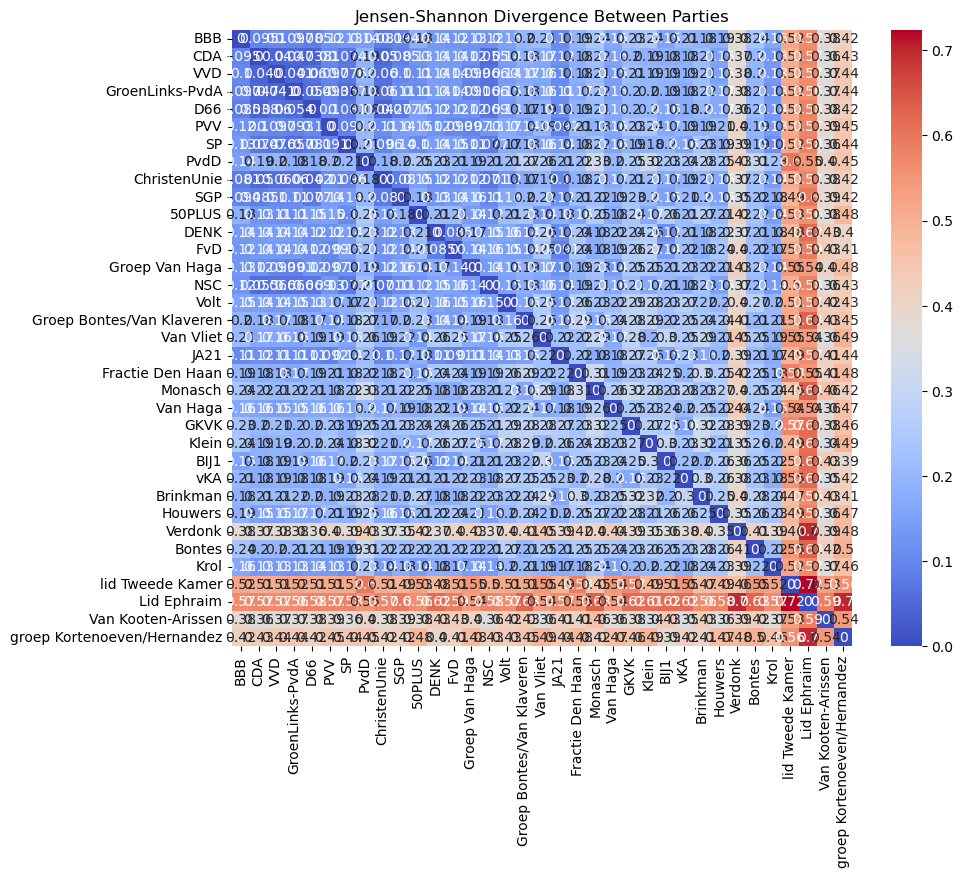

In [19]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with no party
df = df.dropna(subset=['party'])

# Step 1: Build a topic distribution per speech
def build_topic_dist(row):
    dist = {}
    for i in range(1, 4):
        topic = row[f'top_{i}_topic']
        prob = row[f'top_{i}_prob']
        if isinstance(topic, str) and ' - ' in topic:
            topic_id = topic.split(' - ')[0].strip()
            dist[topic_id] = dist.get(topic_id, 0) + prob
    return dist

df['topic_dist'] = df.apply(build_topic_dist, axis=1)

# Step 2: Aggregate distributions per party
from collections import defaultdict

party_topic_counts = defaultdict(lambda: defaultdict(float))

for _, row in df.iterrows():
    party = row['party']
    for topic, prob in row['topic_dist'].items():
        party_topic_counts[party][topic] += prob

# Get all unique topics
all_topics = sorted({topic for counts in party_topic_counts.values() for topic in counts})

# Step 3: Normalize to probability distributions
party_dists = {}
for party, topic_count in party_topic_counts.items():
    vec = np.array([topic_count.get(topic, 0) for topic in all_topics])
    vec = vec / vec.sum()  # normalize
    party_dists[party] = vec

# Step 4: Compute pairwise Jensen-Shannon divergence
party_names = list(party_dists.keys())
jsd_matrix = pd.DataFrame(index=party_names, columns=party_names, dtype=float)

for p1, p2 in combinations(party_names, 2):
    d1 = party_dists[p1]
    d2 = party_dists[p2]
    jsd = jensenshannon(d1, d2, base=2)
    jsd_matrix.loc[p1, p2] = jsd
    jsd_matrix.loc[p2, p1] = jsd

np.fill_diagonal(jsd_matrix.values, 0.0)

# Optional: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(jsd_matrix.astype(float), annot=True, cmap="coolwarm")
plt.title("Jensen-Shannon Divergence Between Parties")
plt.show()


/tmp/ipykernel_2619726/3706564153.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(jsd_matrix, method='average')


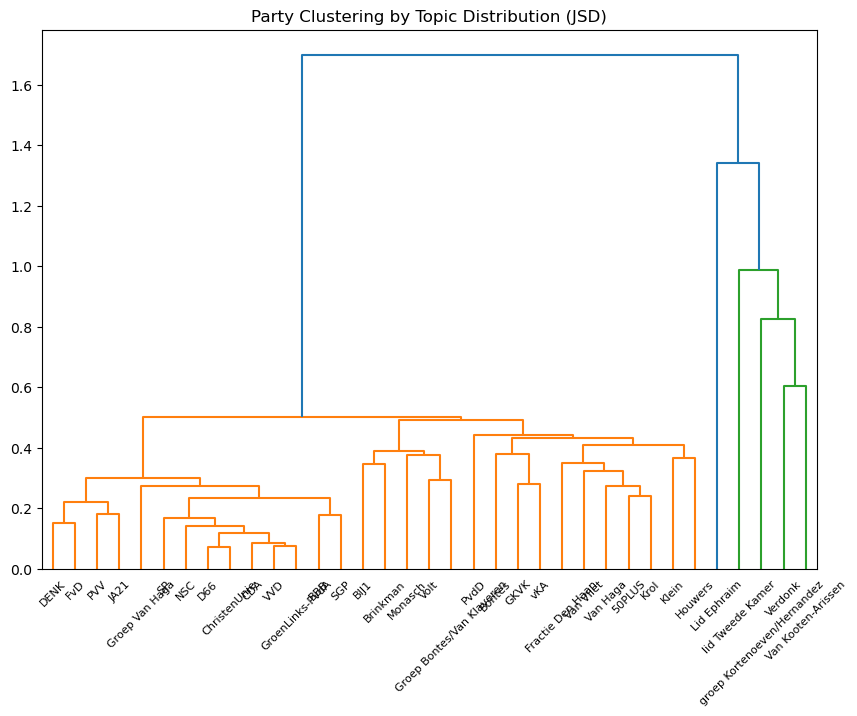

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(jsd_matrix, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=jsd_matrix.index, orientation='top')
plt.title("Party Clustering by Topic Distribution (JSD)")
plt.show()


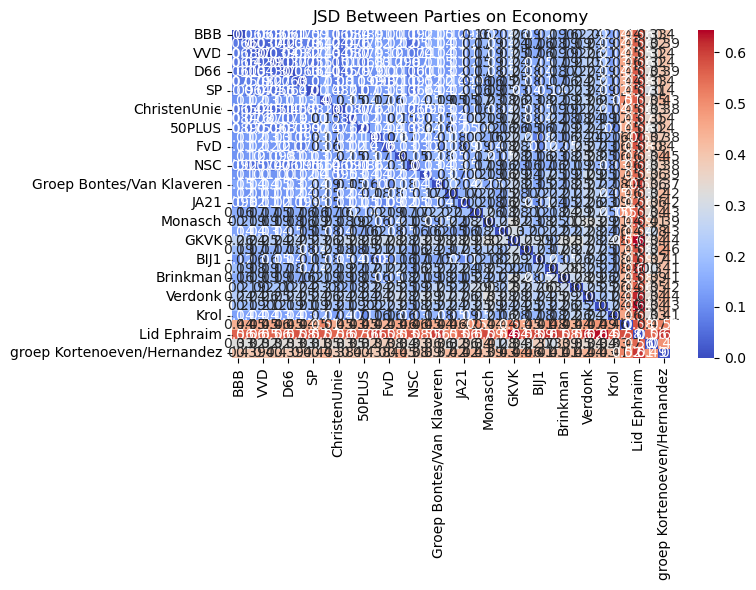

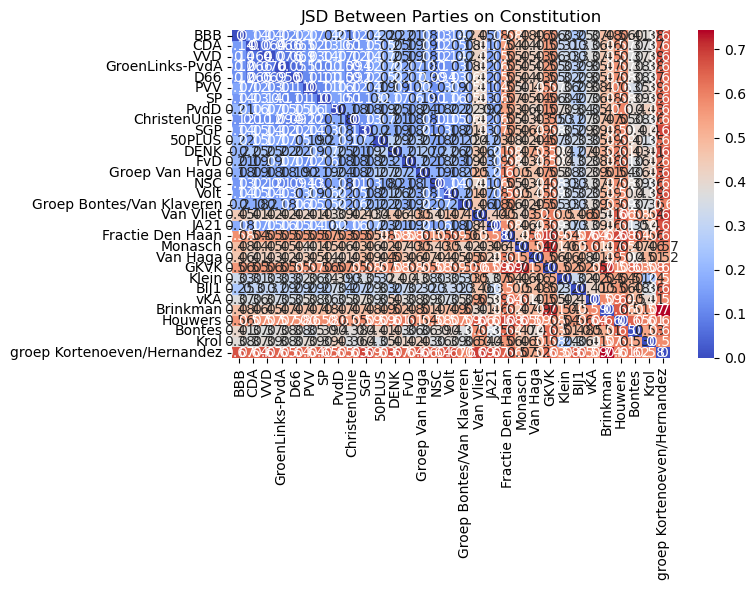

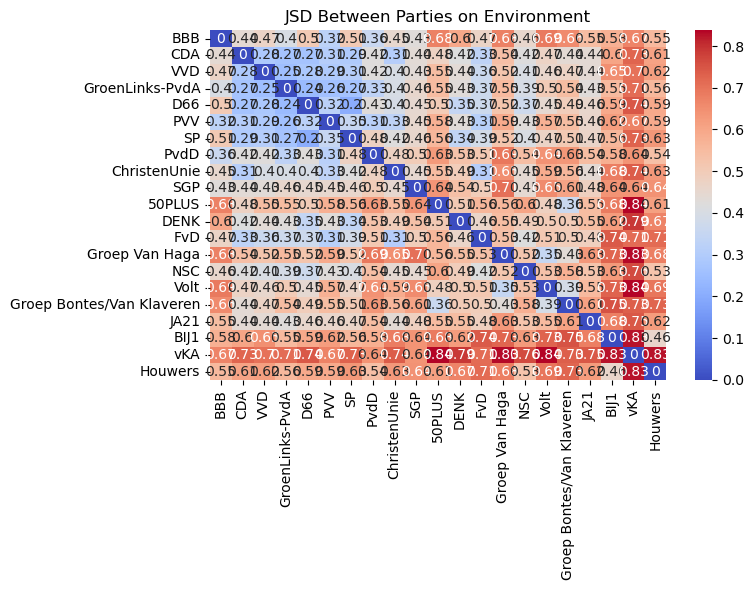

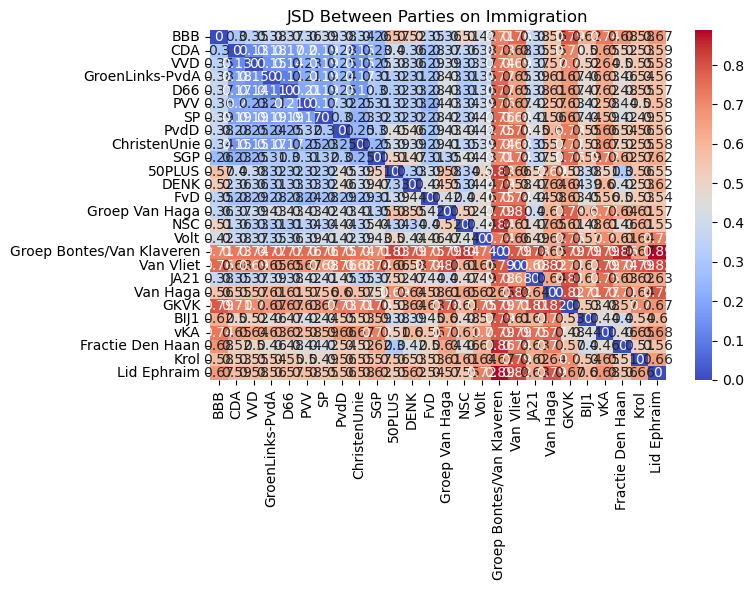

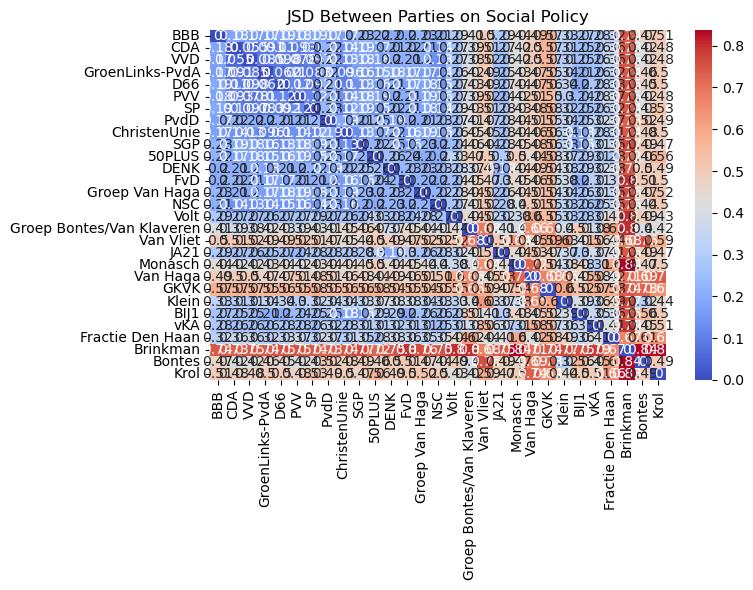

In [21]:
issue_groups = {
    'Economy': {'412', '413', '415'},
    'Constitution': {'203', '204'},
    'Environment': {'601', '602'},
    'Immigration': {'701', '702'},
    'Social Policy': {'501', '502'},
    # Add more based on your full topic list
}


def get_issues_for_speech(row, issue_groups):
    issues = set()
    for i in range(1, 4):
        topic = row.get(f'top_{i}_topic', '')
        if isinstance(topic, str) and ' - ' in topic:
            topic_id = topic.split(' - ')[0].strip()
            for issue, topic_ids in issue_groups.items():
                if topic_id in topic_ids:
                    issues.add(issue)
    return list(issues)

df['issues'] = df.apply(get_issues_for_speech, axis=1, issue_groups=issue_groups)


from collections import defaultdict
from scipy.spatial.distance import jensenshannon
import pandas as pd
import numpy as np

issue_jsd_results = {}

for issue in issue_groups.keys():
    subset = df[df['issues'].apply(lambda x: issue in x)]
    if subset.empty:
        continue

    # Aggregate topic distributions per party
    party_topic_counts = defaultdict(lambda: defaultdict(float))
    
    for _, row in subset.iterrows():
        party = row['party']
        if pd.isna(party):
            continue
        for topic, prob in row['topic_dist'].items():
            party_topic_counts[party][topic] += prob

    all_topics = sorted({topic for counts in party_topic_counts.values() for topic in counts})

    party_dists = {}
    for party, topic_count in party_topic_counts.items():
        vec = np.array([topic_count.get(topic, 0) for topic in all_topics])
        if vec.sum() == 0:
            continue
        vec = vec / vec.sum()
        party_dists[party] = vec

    party_names = list(party_dists.keys())
    jsd_matrix = pd.DataFrame(index=party_names, columns=party_names, dtype=float)

    for p1 in party_names:
        for p2 in party_names:
            if p1 == p2:
                jsd = 0.0
            else:
                jsd = jensenshannon(party_dists[p1], party_dists[p2], base=2)
            jsd_matrix.loc[p1, p2] = jsd

    issue_jsd_results[issue] = jsd_matrix



import seaborn as sns
import matplotlib.pyplot as plt

for issue, matrix in issue_jsd_results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float), annot=True, cmap='coolwarm')
    plt.title(f"JSD Between Parties on {issue}")
    plt.tight_layout()
    plt.show()

